<a href="https://colab.research.google.com/github/juliodouglas1968/juliodouglas/blob/master/DBSCAN_Eps_Ecoli_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Cargamos las librerías
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [0]:
#descargamos el dataset
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/ecoli/ecoli.data", 
                 sep="\s+", usecols=(1,7),
                 names=['mcg', 'alm1'])
# Drop non-continuous variables
#data.drop(["Channel", "Region"], axis = 1, inplace = True)
data


,mcg,alm1
0,0.49,0.35
1,0.07,0.44
2,0.56,0.46
3,0.59,0.36
4,0.23,0.35
5,0.67,0.46
6,0.29,0.34
7,0.21,0.39
8,0.20,0.57
9,0.42,0.30


In [0]:
#escalamos los datos
stscaler = StandardScaler().fit(data)
data = stscaler.transform(data)


Text(0, 0.5, 'alm1')

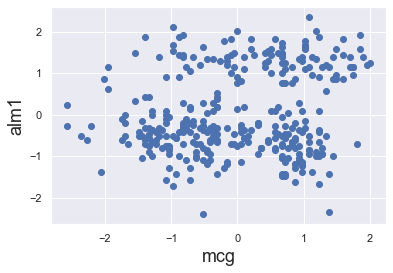

In [0]:
plt.scatter(data[:,0], data[:,1], cmap='gist_rainbow')
plt.xlabel('mcg', fontsize=18)
plt.ylabel('alm1', fontsize=18)

In [0]:
neigh = NearestNeighbors()
nbrs = neigh.fit(data)
distances, indices = nbrs.kneighbors(data)

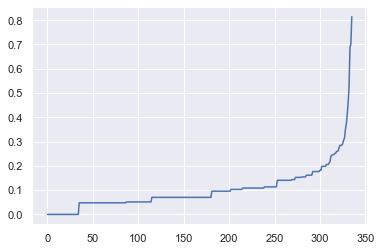

In [0]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [0]:
m = DBSCAN(eps=0.3)
m.fit(data)



DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [0]:
m_orig = DBSCAN()
m_orig.fit(data)



DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [0]:
# función para devolver el número de clústeres hallados
def clusteres_unicos(lista): 
    conjunto = set(lista) 

    return len((list(conjunto))) 

In [0]:
clusters = m.labels_
print('Número de clusters en el DBSCAN mejorado: ', clusteres_unicos(m.labels_))

Número de clusters en el DBSCAN mejorado:  3


In [0]:
clusters_orig = m_orig.labels_

print('Número de clusters en el DBSCAN original: ', clusteres_unicos(m_orig.labels_))

Número de clusters en el DBSCAN original:  2


In [0]:
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

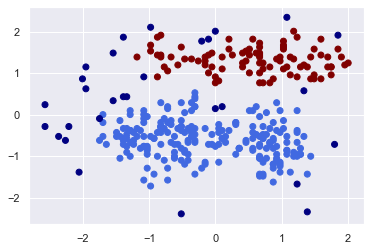

In [0]:
#visualizamos el resultado de la mejora del algoritmo DBSCAN
plt.scatter(data[:,0], data[:,1], c=vectorizer(clusters))

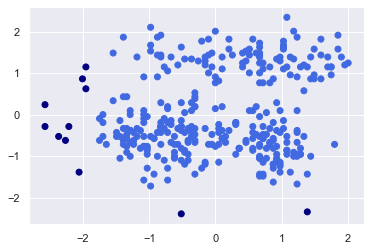

In [0]:
#visualizamos el resultado del algoritmo DBSCAN original
plt.scatter(data[:,0], data[:,1], c=vectorizer(clusters_orig))

In [0]:
Dy_original=vectorizer(clusters_orig)
Dy_mejorado=vectorizer(clusters)
#Dx=data[:,1]

In [0]:
def encuentra_vecindario(mDistancia, i, eps):
    vecinos = np.where(mDistancia[i,:] < eps)[0]
    
    vecinos = vecinos[vecinos != i]
            
    return vecinos

In [0]:
def agrupamiento_densidad_DBSCAN(mDistancia, eps, M):
 
    labels = np.zeros(mDistancia.shape[0])
    C = 0
    
    for i in np.arange(mDistancia.shape[0]):
    
        if labels[i] != 0:
            continue
        
        vecindario = encuentra_vecindario(mDistancia, i, eps)
        print('Vecindario:', vecindario)  # Descomenta para ver la salida 
        
        if vecindario.size < M: ## Tu código aquí ##
            # Si NO es un punto nuclear
            labels[i] = -1
        else:  
            # Si es un punto nuclear, le asignamos un nuevo C y tratamos de expandirlo
            C += 1
            labels[i] = C
            expandir_cluster(mDistancia, labels, vecindario, C, eps, M)
    
    return labels

In [0]:
from sklearn.metrics.pairwise import euclidean_distances

eps_m = .03# epsilon mejorado
M = 38

eps_o = .05 # epsilon original

mDistancia = euclidean_distances(data)
Dyp_mejorado = agrupamiento_densidad_DBSCAN(mDistancia,eps_m,M)
Dyp_original = agrupamiento_densidad_DBSCAN(mDistancia,eps_o,M)

Vecindario: []
Vecindario: []
Vecindario: [32]
Vecindario: []
Vecindario: []
Vecindario: []
Vecindario: [82]
Vecindario: []
Vecindario: []
Vecindario: []
Vecindario: []
Vecindario: []
Vecindario: []
Vecindario: []
Vecindario: []
Vecindario: []
Vecindario: []
Vecindario: []
Vecindario: []
Vecindario: []
Vecindario: []
Vecindario: []
Vecindario: []
Vecindario: []
Vecindario: []
Vecindario: []
Vecindario: [ 66 120]
Vecindario: []
Vecindario: []
Vecindario: []
Vecindario: []
Vecindario: [80 90]
Vecindario: [2]
Vecindario: [127]
Vecindario: []
Vecindario: []
Vecindario: []
Vecindario: []
Vecindario: [300]
Vecindario: []
Vecindario: []
Vecindario: []
Vecindario: []
Vecindario: []
Vecindario: []
Vecindario: []
Vecindario: []
Vecindario: []
Vecindario: []
Vecindario: []
Vecindario: []
Vecindario: []
Vecindario: []
Vecindario: []
Vecindario: []
Vecindario: []
Vecindario: []
Vecindario: []
Vecindario: []
Vecindario: []
Vecindario: [144]
Vecindario: [272]
Vecindario: []
Vecindario: []
Vecindario:

In [0]:
def matriz_confusion(cat_real, cat_pred):
    cats = np.unique(cat_real)
    clusts = np.unique(cat_pred)
    mat = np.array([[np.sum(np.logical_and(cat_real==cats[i], cat_pred==clusts[j])) 
                     for j in np.arange(clusts.size)] 
                    for i in np.arange(cats.size)])
    return(mat)

def medida_error(mat):
    assign = np.sum([np.max(mat[l,:]) for l in np.arange(mat.shape[0])])
    return 1 - assign / float(np.sum(mat))

def medida_pureza(mat):
    totales = np.sum(mat,0)/float(np.sum(mat))
    return np.sum([totales[k] * np.max(mat[:,k]/float(np.sum(mat[:,k]))) for k in np.arange(mat.shape[1])])

def medida_precision(mat, l, k):
    return mat[l,k]/float(np.sum(mat[:,k]))

def medida_recall(mat, l, k):
    return mat[l,k]/float(np.sum(mat[l,:]))

def medida_f1_especifica(mat, l, k):
    prec = medida_precision(mat, l, k)
    rec = medida_recall(mat, l, k)
    if (prec+rec)==0:
        return 0
    else:
        return 2*prec*rec/(prec+rec)

def medida_f1(mat):
    totales = np.sum(mat,1)/float(np.sum(mat))
    assign = np.sum([totales[l] * np.max([medida_f1_especifica(mat, l, k) 
                                          for k in np.arange(mat.shape[1])]) 
                     for l in np.arange(mat.shape[0])])
    return assign

mC = matriz_confusion(Dy_original,Dyp_original)
mC_mejorado = matriz_confusion(Dy_mejorado,Dyp_mejorado)

print(mC)
print('El valor del error cometido es = ', medida_error(mC))
print('La pureza del agrupamiento obtenido es = ', medida_pureza(mC))
print('El valor F1 es = ', medida_f1(mC))

print('**************mejorado*****************************************')

print(mC_mejorado)
print('El valor del error cometido es = ', medida_error(mC_mejorado))
print('La pureza del agrupamiento obtenido es = ', medida_pureza(mC_mejorado))
print('El valor F1 es = ', medida_f1(mC_mejorado))

[[ 11]
 [325]]
El valor del error cometido es =  0.0
La pureza del agrupamiento obtenido es =  0.9672619047619048
El valor F1 es =  0.9532408759760559
**************mejorado*****************************************
[[ 91]
 [ 29]
 [216]]
El valor del error cometido es =  0.0
La pureza del agrupamiento obtenido es =  0.6428571428571429
El valor F1 es =  0.6322576865620637
